In [162]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from  sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,confusion_matrix,accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [164]:
df=pd.read_excel('Date_Fruit_Datasets.xlsx')
df.head(5)

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


preprocessing

In [166]:
df=pd.read_excel('Date_Fruit_Datasets.xlsx')
label_encoder=LabelEncoder()
df['Class']=label_encoder.fit_transform(df['Class'])
y=df[['Class']]
x=df
x.drop('Class',inplace=True,axis=1)
df.head(5)

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,0.6019,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,0.4134,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,0.9183,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,1.8028,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,0.8865,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666


In [167]:
#applying smote to equalize the total rows of every class
smote = SMOTE()
x, y = smote.fit_resample(x,y)
df = pd.concat([pd.DataFrame(x), pd.DataFrame(y)], axis=1)
df

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908000,837.848400,645.669300,0.637300,733.153900,0.994700,424428,0.783100,1.297600,...,3.237000,2.957400,4.228700,-59191263232,-50714214400,-39922372608,58.725500,54.955400,47.840000,0
1,338136,2085.144000,723.819800,595.207300,0.569000,656.146400,0.997400,339014,0.779500,1.216100,...,2.622800,2.635000,3.170400,-34233065472,-37462601728,-31477794816,50.025900,52.816800,47.831500,0
2,526843,2647.394000,940.737900,715.363800,0.649400,819.022200,0.996200,528876,0.765700,1.315000,...,3.751600,3.861100,4.719200,-93948354560,-74738221056,-60311207936,65.477200,59.286000,51.937800,0
3,416063,2351.210000,827.980400,645.298800,0.626600,727.837800,0.994800,418255,0.775900,1.283100,...,5.040100,8.613600,8.261800,-32074307584,-32060925952,-29575010304,43.390000,44.125900,41.188200,0
4,347562,2160.354000,763.987700,582.835900,0.646500,665.229100,0.990800,350797,0.756900,1.310800,...,2.701600,2.976100,4.414600,-39980974080,-35980042240,-25593278464,52.774300,50.908000,42.666600,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423,268336,1946.659786,755.053014,453.764396,0.799176,584.504134,0.994383,269860,0.777671,1.663956,...,2.629619,2.031681,2.397538,-47536589926,-40238489883,-37589467529,64.897998,59.765628,57.530369,6
1424,331911,2136.159611,808.057027,525.089821,0.760108,650.078646,0.996221,333172,0.796368,1.538893,...,2.141482,2.108185,2.300700,-50118717150,-37892080724,-34993043076,59.791849,52.140015,49.988420,6
1425,281574,1988.012055,722.790970,498.265618,0.724596,598.125052,0.988556,284715,0.747249,1.451359,...,2.685571,3.043501,4.336034,-20359956538,-17026765628,-15935985691,42.121538,38.640555,37.602525,6
1426,265712,1949.283353,689.511111,495.553058,0.695299,581.545896,0.979834,271298,0.703036,1.391358,...,2.634116,2.616629,2.812884,-35208084419,-27113414462,-22661751107,55.666451,48.609337,44.527992,6


In [169]:
#preprocessing
df.isnull().sum()

,0
AREA,0
PERIMETER,0
MAJOR_AXIS,0
MINOR_AXIS,0
ECCENTRICITY,0
EQDIASQ,0
SOLIDITY,0
CONVEX_AREA,0
EXTENT,0
ASPECT_RATIO,0


In [171]:
#applying Minmax scalar to bring data to a common point
scalar=MinMaxScaler()

In [172]:
x_new=scalar.fit_transform(x)
x_new

array([[0.77227446, 0.77207865, 0.56560444, ..., 0.67351302, 0.55053709,
        0.4946647 ],
       [0.61783464, 0.61747978, 0.43690403, ..., 0.53892305, 0.51634149,
        0.49450116],
       [0.96467405, 0.9133745 , 0.6817325 , ..., 0.77796738, 0.61978216,
        0.57350706],
       ...,
       [0.5138749 , 0.56636225, 0.43574282, ..., 0.41663606, 0.28966736,
        0.29769397],
       [0.48472088, 0.54598054, 0.39818092, ..., 0.62618701, 0.44906535,
        0.43094112],
       [0.51978032, 0.57186467, 0.44313849, ..., 0.5208824 , 0.39208405,
        0.41385657]])

In [174]:
x=pd.DataFrame(x_new,columns=x.columns)
x

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
0,0.772274,0.772079,0.565604,0.841941,0.446429,0.871512,0.983209,0.767108,0.787438,0.000435,...,0.395739,0.062495,0.053715,0.080752,0.458253,0.455197,0.546327,0.673513,0.550537,0.494665
1,0.617835,0.617480,0.436904,0.775906,0.342186,0.773229,1.000000,0.611906,0.776970,0.000282,...,0.350002,0.037387,0.040885,0.046033,0.687312,0.599151,0.643352,0.538923,0.516341,0.494501
2,0.964674,0.913374,0.681733,0.933143,0.464896,0.981104,0.992537,0.956896,0.736842,0.000467,...,0.472509,0.083531,0.089677,0.096843,0.139263,0.194220,0.312066,0.777967,0.619782,0.573507
3,0.761063,0.757502,0.554467,0.841456,0.430098,0.864727,0.983831,0.755891,0.766502,0.000408,...,0.687121,0.136202,0.278800,0.213061,0.707125,0.657830,0.665214,0.436260,0.377376,0.366683
4,0.635159,0.657060,0.482240,0.759716,0.460470,0.784821,0.958955,0.633316,0.711253,0.000459,...,0.464794,0.040608,0.054459,0.086850,0.634560,0.615256,0.710963,0.581443,0.485820,0.395128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423,0.489544,0.544600,0.472156,0.590812,0.693491,0.681794,0.981236,0.486249,0.771652,0.001120,...,0.181779,0.037666,0.016876,0.020679,0.565217,0.568996,0.573131,0.769007,0.627451,0.681109
1424,0.606393,0.644328,0.531980,0.684149,0.633864,0.765485,0.992667,0.601291,0.826018,0.000886,...,0.237631,0.017712,0.019921,0.017502,0.541519,0.594486,0.602963,0.690010,0.505520,0.536001
1425,0.513875,0.566362,0.435743,0.649047,0.579664,0.699178,0.945002,0.513242,0.683191,0.000722,...,0.301911,0.039953,0.057141,0.084273,0.814636,0.821149,0.821922,0.416636,0.289667,0.297694
1426,0.484721,0.545981,0.398181,0.645497,0.534950,0.678019,0.890761,0.488862,0.554627,0.000610,...,0.368972,0.037850,0.040154,0.034305,0.678364,0.711576,0.744646,0.626187,0.449065,0.430941


In [175]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

Logistic classifcation


In [176]:
model=LogisticRegression(multi_class='multinomial')

In [177]:
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [178]:
y_pred=model.predict(x_test)

In [180]:
print("mean squared error ",mean_squared_error(y_test,y_pred))
print("accuracy score ",accuracy_score(y_test,y_pred))

mean squared error  1.083916083916084
accuracy score  0.9195804195804196


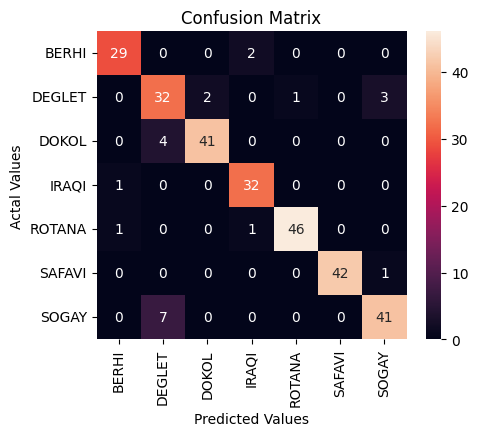

In [181]:
cm = confusion_matrix(y_test, y_pred)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['BERHI', 'DEGLET', 'DOKOL', 'IRAQI', 'ROTANA', 'SAFAVI', 'SOGAY'],
                     columns = ['BERHI', 'DEGLET', 'DOKOL', 'IRAQI', 'ROTANA', 'SAFAVI', 'SOGAY'])

#Plotting the 3x3 confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

Decision tree classifier

In [182]:
from sklearn.tree import DecisionTreeClassifier

In [183]:
clf = DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

In [184]:
y_pred=clf.predict(x_test)

In [185]:
print("accuracy",accuracy_score(y_test, y_pred))
print("mean squared error",mean_squared_error(y_test,y_pred))

accuracy 0.8951048951048951
mean squared error 1.5


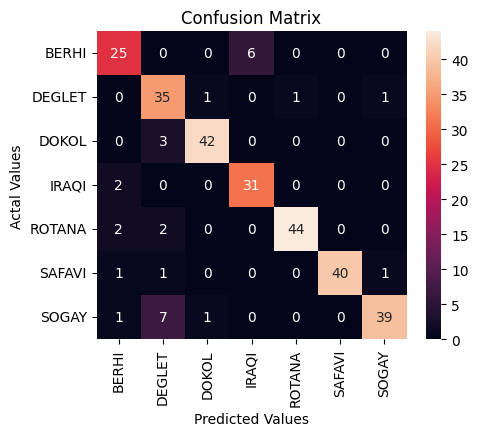

In [186]:
cm = confusion_matrix(y_test, y_pred)

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['BERHI', 'DEGLET', 'DOKOL', 'IRAQI', 'ROTANA', 'SAFAVI', 'SOGAY'],
                     columns = ['BERHI', 'DEGLET', 'DOKOL', 'IRAQI', 'ROTANA', 'SAFAVI', 'SOGAY'])

#Plotting the 3x3 confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

SVC for classfication


In [188]:
from sklearn import svm
clf = svm.SVC()
clf.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [189]:
y_pred=clf.predict(x_test)

In [191]:
print("accuracy",accuracy_score(y_test, y_pred))
print("mean squared error",mean_squared_error(y_test,y_pred))

accuracy 0.9230769230769231
mean squared error 1.1748251748251748


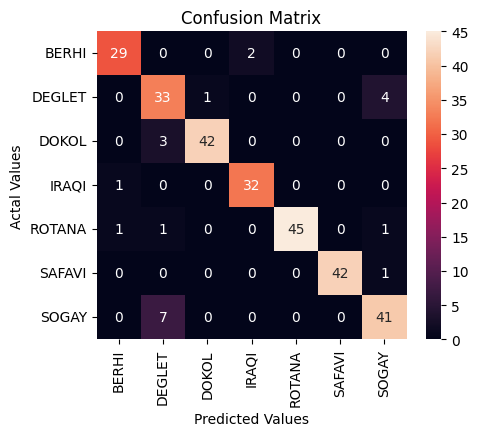

In [190]:
cm = confusion_matrix(y_test, y_pred)

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['BERHI', 'DEGLET', 'DOKOL', 'IRAQI', 'ROTANA', 'SAFAVI', 'SOGAY'],
                     columns = ['BERHI', 'DEGLET', 'DOKOL', 'IRAQI', 'ROTANA', 'SAFAVI', 'SOGAY'])

#Plotting the 3x3 confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()